In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#simple EDA

In [9]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


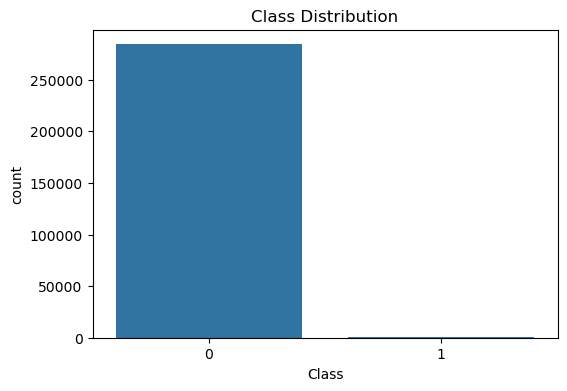

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title('Class Distribution')
plt.show()

In [13]:
X = df.drop(['Class','Time'],axis=1)

In [15]:
y = df['Class'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
#Baseline model

In [21]:
model = LogisticRegression(max_iter=1000, random_state=42)

In [23]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9991397773954567

In [29]:
f1_score(y_test,y_pred)

0.72

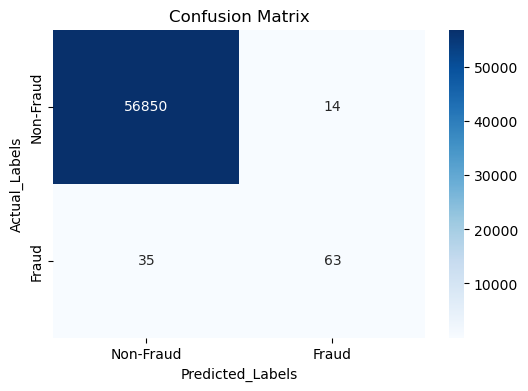

In [31]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
#oversampling

In [35]:
ros = RandomOverSampler(random_state=42)

In [37]:
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)

In [39]:
class_count = y_resampled.value_counts()

In [41]:
class_count

Class
0    227451
1    227451
Name: count, dtype: int64

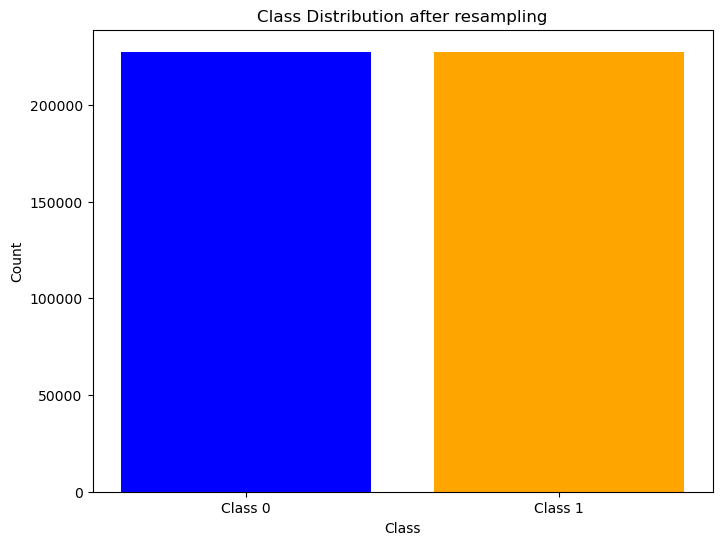

In [43]:
plt.figure(figsize=(8,6))
plt.bar(class_count.index, class_count.values, color=['blue','orange'])
plt.xticks([0,1],['Class 0','Class 1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution after resampling')
plt.show()

In [45]:
model.fit(X_resampled,y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [46]:
y_pred_ros = model.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_ros)

0.9746322109476493

In [48]:
f1_score(y_test,y_pred_ros)

0.11076923076923077

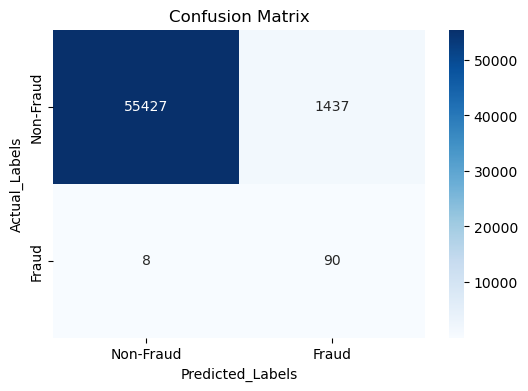

In [49]:
cm = confusion_matrix(y_test,y_pred_ros)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
#SMOTE

In [57]:
smote = SMOTE(random_state=42)

In [59]:
X_resampled,y_resampled = smote.fit_resample(X_train,y_train)

In [61]:
class_count = y_resampled.value_counts()

In [63]:
class_count

Class
0    227451
1    227451
Name: count, dtype: int64

In [65]:
model.fit(X_resampled,y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [66]:
y_pred_smote = model.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred_smote)

0.9811628805168358

In [68]:
f1_score(y_test,y_pred_smote)

0.14228617106314947

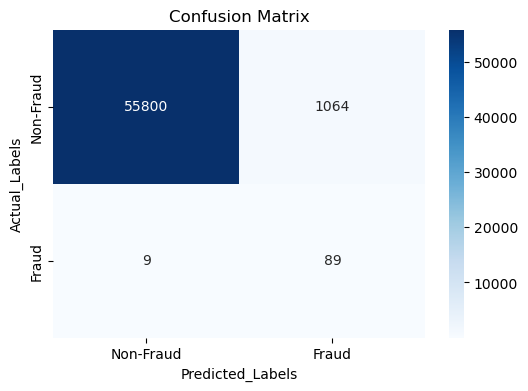

In [73]:
cm = confusion_matrix(y_test,y_pred_smote)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()

In [75]:
adasyn = ADASYN(random_state=42)

In [77]:
scaler = StandardScaler()

In [79]:
X_train_scaled = scaler.fit_transform(X_train)

In [81]:
X_resampled,y_resampled = adasyn.fit_resample(X_train_scaled,y_train)

In [83]:
class_count = y_resampled.value_counts()

In [85]:
class_count

Class
1    227468
0    227451
Name: count, dtype: int64

In [87]:
model.fit(X_resampled,y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [89]:
X_test_scaled = scaler.transform(X_test)

In [91]:
y_pred_adasyn = model.predict(X_test_scaled)

In [93]:
accuracy_score(y_test,y_pred_adasyn)

0.9135915171517854

In [95]:
f1_score(y_test,y_pred_adasyn)

0.03565830721003135

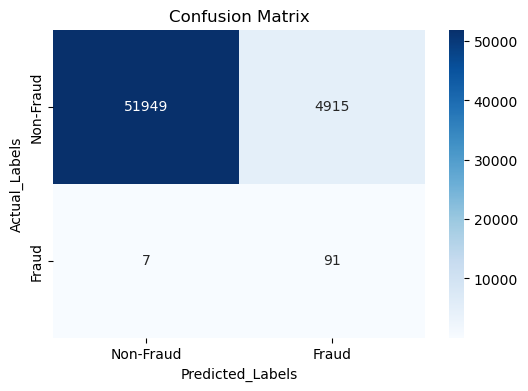

In [97]:
cm = confusion_matrix(y_test,y_pred_adasyn)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()

In [99]:
#under sampling

In [101]:
#random under sampler

In [103]:
undersample = RandomUnderSampler(random_state=42)

In [105]:
X_resampled_under, y_resampled_under = undersample.fit_resample(X_train,y_train)

In [107]:
class_count = y_resampled_under.value_counts()

In [109]:
class_count

Class
0    394
1    394
Name: count, dtype: int64

In [111]:
model.fit(X_resampled_under,y_resampled_under)

LogisticRegression(max_iter=1000, random_state=42)

In [113]:
y_pred_under = model.predict(X_test)

In [115]:
accuracy_score(y_test,y_pred_under)

0.959481759769671

In [117]:
f1_score(y_test,y_pred_under)

0.07234726688102894

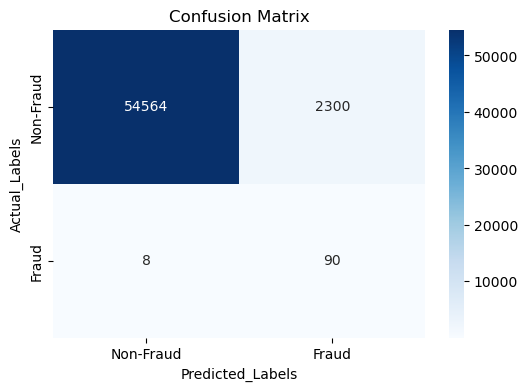

In [119]:
cm = confusion_matrix(y_test,y_pred_under)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()

In [121]:
EditedNearestNeighbours = EditedNearestNeighbours()

In [123]:
X_resampled_under, y_resampled_under = EditedNearestNeighbours.fit_resample(X_train,y_train)

In [124]:
class_count = y_resampled_under.value_counts()

In [125]:
class_count

Class
0    227304
1       394
Name: count, dtype: int64

In [126]:
model.fit(X_resampled_under,y_resampled_under)

LogisticRegression(max_iter=1000, random_state=42)

In [127]:
y_pred_under = model.predict(X_test)

In [128]:
accuracy_score(y_test,y_pred_under)

0.9992626663389628

In [129]:
f1_score(y_test,y_pred_under)

0.7692307692307693

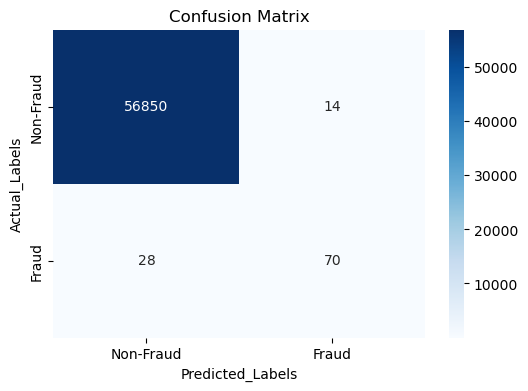

In [130]:
cm = confusion_matrix(y_test,y_pred_under)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()

In [134]:
#cost sensitive learning

In [141]:
model = LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced')

In [143]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [144]:
y_pred = model.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred)

0.9745093220041431

In [149]:
f1_score(y_test,y_pred)

0.11029411764705882

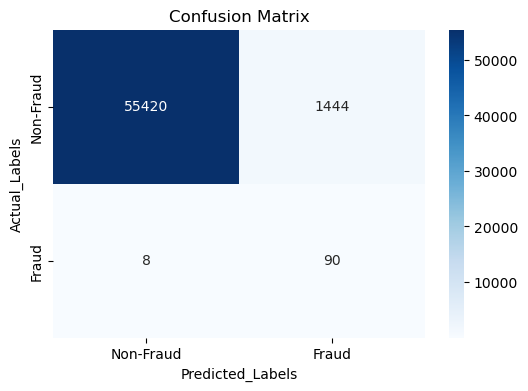

In [151]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()

In [153]:
class_weights = {0:1,1:10}

In [155]:
model = LogisticRegression(max_iter=1000,random_state=42,class_weight=class_weights)

In [157]:
model.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=1000, random_state=42)

In [158]:
y_pred = model.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred)

0.9991046662687406

In [163]:
f1_score(y_test,y_pred)

0.7649769585253456

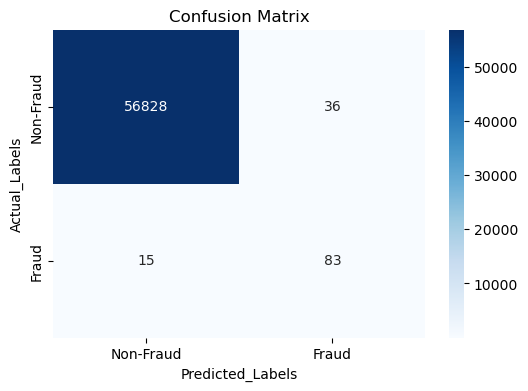

In [165]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()